<a href="https://colab.research.google.com/github/adityasahu88/PROJECT/blob/main/Netflix_EDA%F0%9F%93%8A%2B%F0%9F%8D%BFMovie_Recommendation_System%F0%9F%8E%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
#1.Reading DataSet
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [16]:
#2.Data Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [17]:
#Check Missing values
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

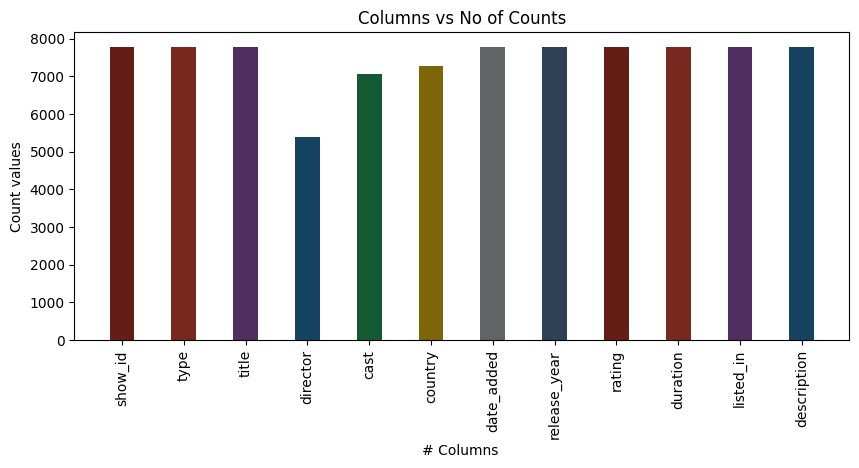

In [18]:
fig = plt.figure(figsize = (10, 4))

# creating the bar plot
plt.bar(df.columns,df.count(), color =['#641E16',"#78281F","#512E5F","#154360",
                                       "#145A32","#7D6608","#626567","#2E4053"],
        width = 0.4)
plt.xlabel("# Columns ")
plt.ylabel("Count values")
plt.title("Columns vs No of Counts")
plt.xticks(rotation=90)
plt.show()

1.   There are missing values in column director,cast,
      country and date_added.
2.   We can't randomly fill the missing values in columns
     of director and cast, so we can drop them.
3.  For minimal number of missing values in country and
    date_added,rating, we can fill them using mode(most common value) and mean.

In [19]:
# drop two features :director & Cast
df=df.dropna(how="any",subset=["director","cast"])


In [20]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [21]:
df["country"]=df["country"].fillna(df["country"].mode()[0])
df["date_added"]=df["date_added"].fillna(df["date_added"].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [22]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

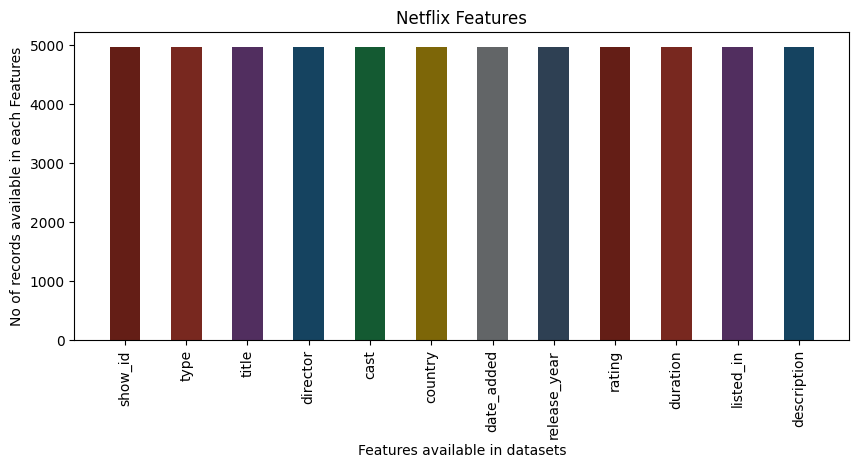

In [23]:
fig = plt.figure(figsize = (10, 4))
plt.bar(df.columns,df.count(),width=0.5,color =['#641E16',"#78281F","#512E5F","#154360",
                                       "#145A32","#7D6608","#626567","#2E4053"])
plt.xticks(rotation=90)
plt.xlabel("Features available in datasets")
plt.ylabel("No of records available in each Features")
plt.title("Netflix Features")
plt.show()

Exploratory Data Analysis

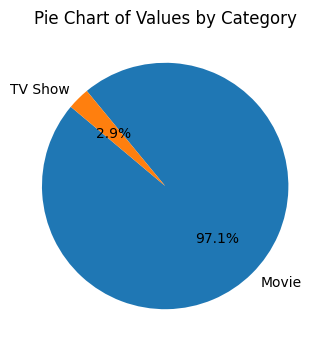

In [24]:
#Movies Vs TV count
fig = plt.figure(figsize = (10, 4))
df_pie=df.groupby("type").count()[["show_id"]].reset_index()
plt.pie(df_pie['show_id'], labels=df_pie['type'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Values by Category')
plt.ylabel(None)  # remove y-axis label
plt.show()

**Adding some new columns:**

In [25]:
df["Genre"]=df["listed_in"].apply(lambda x:x.split(",")[0])
df["year_add"]=df["date_added"].apply(lambda x:x.split(",")[1])
df["month_add"]=df["date_added"].apply(lambda x:x.split(" ")[0])
df["country_main"]=df["country"].apply(lambda x:x.split(",")[0])

**Making two new dataframes, one with movies collection and other with TV shows collection:**

*   movie df
*   tv df


In [26]:
movie_df = df[df["type"]=="Movie"]
tv_df    = df[df['type'] == 'TV Show']

In [27]:
# Top 20 movies based on duration
movie_df["duration"]=movie_df["duration"].str.replace(" min","")
movie_df["duration"]=movie_df["duration"].astype(int)
df_top_20=movie_df[["title","duration"]].sort_values(by="duration",ascending=False).reset_index()
df_top_20.head(20)

,index,title,duration
0,6850,The School of Mischief,253
1,4490,No Longer kids,237
2,3694,Lock Your Girls In,233
3,5108,Raya and Sakina,230
4,5376,Sangam,228
5,3521,Lagaan,224
6,3195,Jodhaa Akbar,214
7,6507,The Irishman,209
8,3282,Kabhi Khushi Kabhie Gham,209
9,4484,No Direction Home: Bob Dylan,208


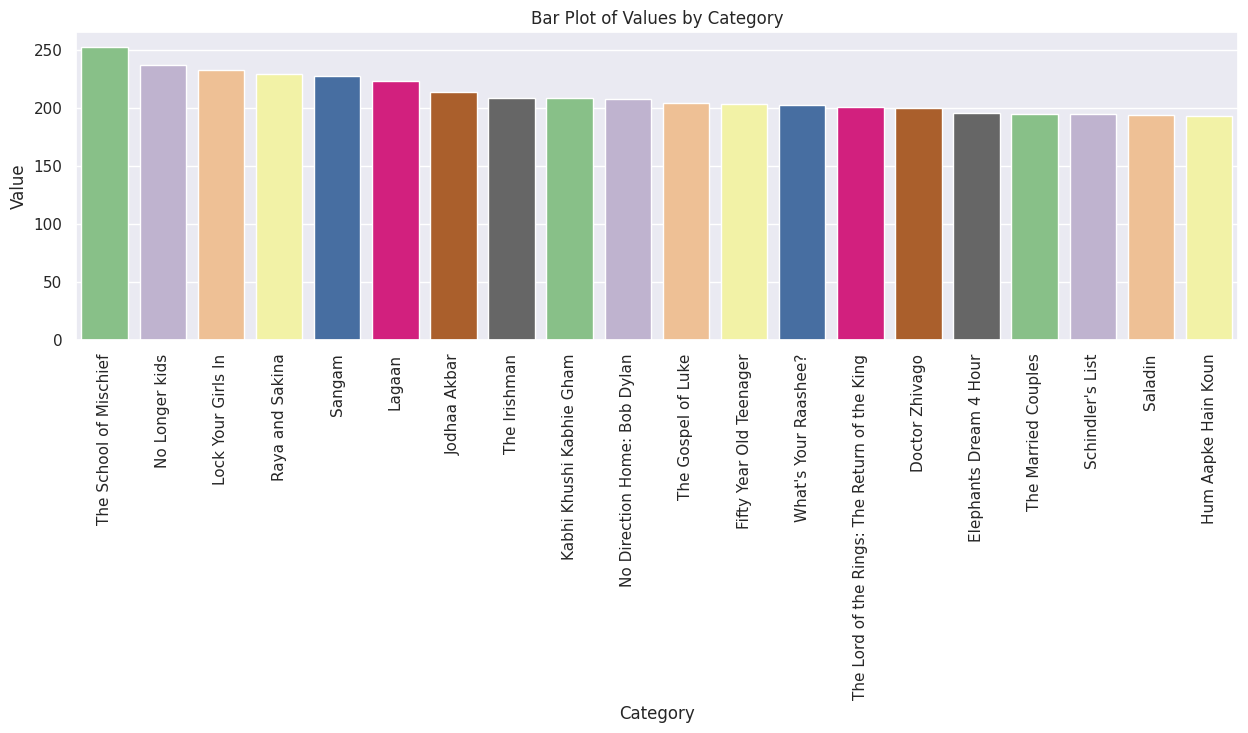

In [28]:
plt.figure(figsize=(15, 4))
sns.set(style="darkgrid")
sns.barplot(x='title', y='duration', data=df_top_20.head(20),palette="Accent")
plt.title('Bar Plot of Values by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()


In [29]:
# Top 20 tv shows based on duration
tv_df["duration"]=tv_df["duration"].str.replace(" Season","")
tv_df["duration"]=tv_df["duration"].str.replace("s","")
tv_df["duration"]=tv_df["duration"].astype(int)
df_top_20_tv=tv_df[["title","duration"]].sort_values(by="duration",ascending=False).reset_index()
df_top_20_tv.head(20)

,index,title,duration
0,5912,Supernatural,15
1,4404,Naruto,9
2,1181,Call the Midwife,9
3,584,Arrow,8
4,6415,The Great British Baking Show,8
5,5291,Royal Pains,8
6,6359,The Flash,6
7,2130,Father Brown,6
8,1470,Comedians in Cars Getting Coffee,6
9,2313,Fullmetal Alchemist: Brotherhood,5


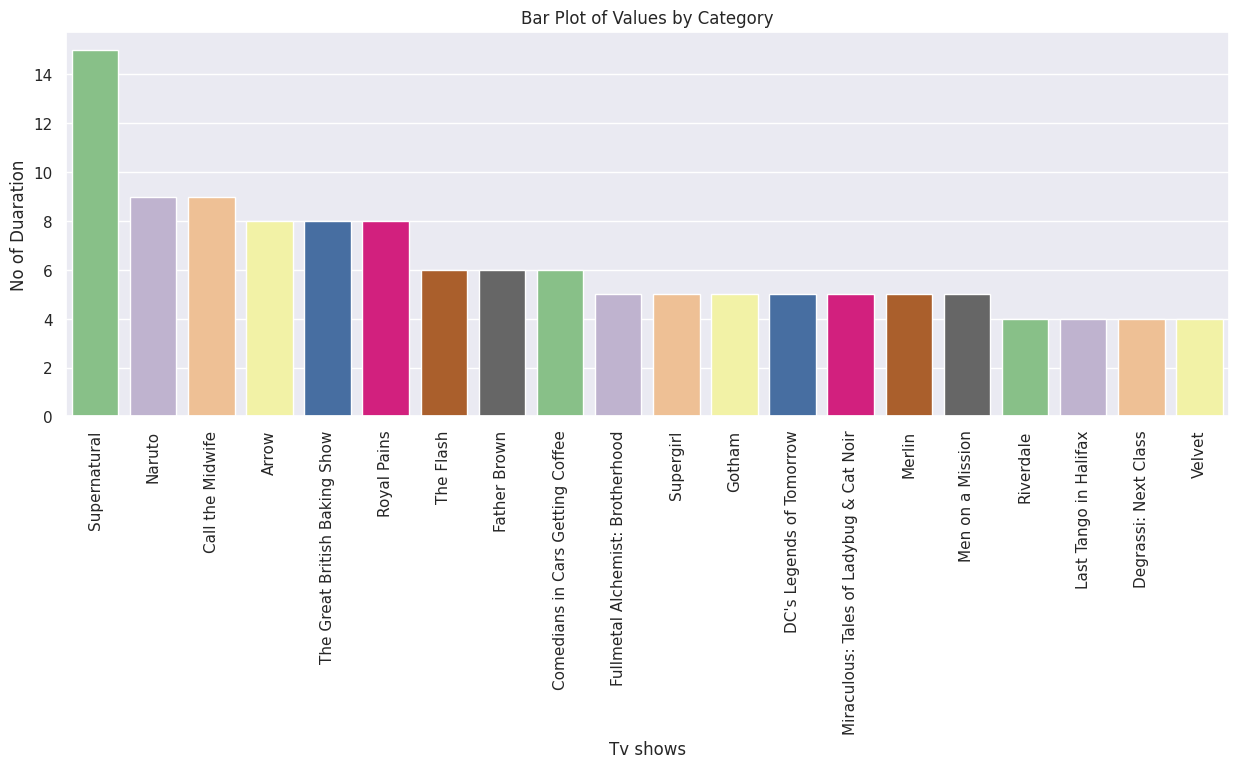

In [30]:
#plot top 20 tv shows
plt.figure(figsize=(15,5))
sns.barplot(data=df_top_20_tv.head(20),x="title",y="duration",palette="Accent")
plt.xlabel("Tv shows")
plt.ylabel("No of Duaration")
plt.xticks(rotation=90)
plt.title('Bar Plot of Values by Category')
plt.show()


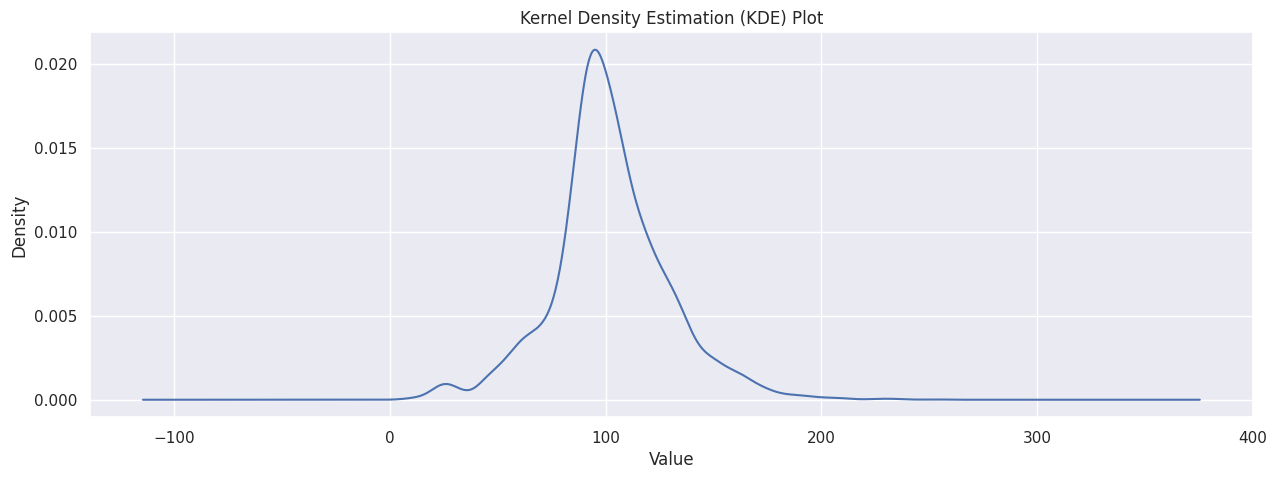

In [31]:
#Movies based in duration
data_movie = movie_df["duration"]
data_movie
fig=plt.figure(figsize=(15,5))
data_movie.plot(kind="kde")
plt.title('Kernel Density Estimation (KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

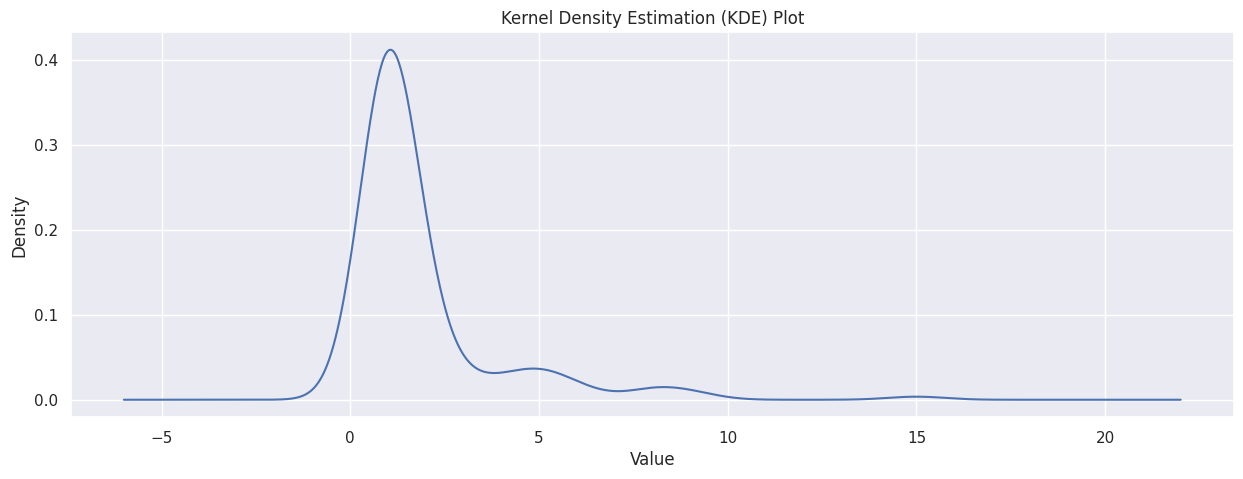

In [32]:
#Movies based in duration
fig=plt.figure(figsize=(15,5))
tv_df["duration"].plot(kind="kde")
plt.title('Kernel Density Estimation (KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

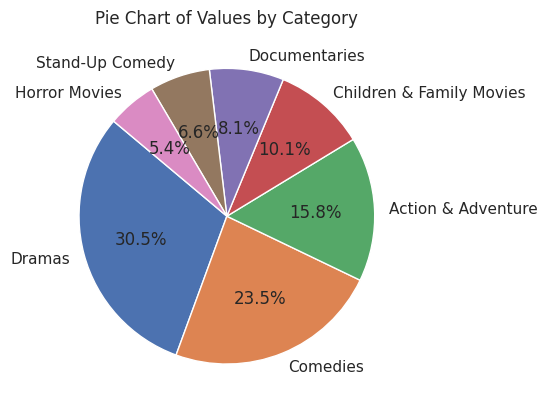

In [33]:
#Tv shows distribution based on geners
genre=movie_df[["Genre","show_id"]].groupby("Genre").count().reset_index().sort_values(by="show_id",ascending=False).head(7)
plt.pie(genre['show_id'], labels=genre['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Values by Category')
plt.ylabel(None)  # remove y-axis label
plt.show()

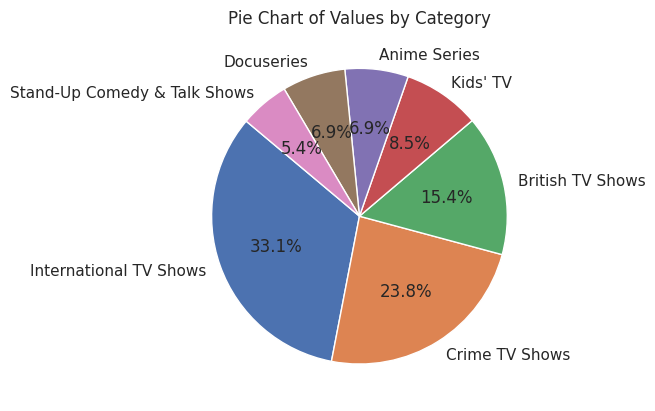

In [34]:
genre_tv=tv_df[["Genre","show_id"]].groupby("Genre").count().reset_index().sort_values(by="show_id",ascending=False).head(7)
plt.pie(genre_tv['show_id'], labels=genre_tv['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Values by Category')
plt.ylabel(None)  # remove y-axis label
plt.show()

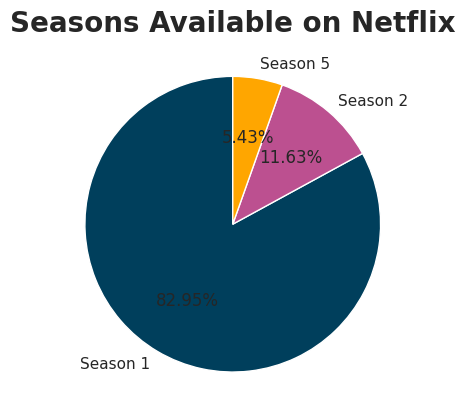

In [35]:
tv_seasons=tv_df[["duration","show_id"]].groupby("duration").count().reset_index().sort_values(by="show_id",ascending=False).head(3)
tv_seasons["duration"]=tv_seasons["duration"].astype('str')
myseasons=[]
for i in tv_seasons["duration"]:
  myseasons.append("Season "+i)
plt.pie(tv_seasons["show_id"],labels= myseasons,autopct='%1.2f%%', startangle=90,
                       colors=['#003f5c', '#bc5090', '#ffa600'])
plt.title('Seasons Available on Netflix', fontsize=20, fontweight='bold');
plt.show()

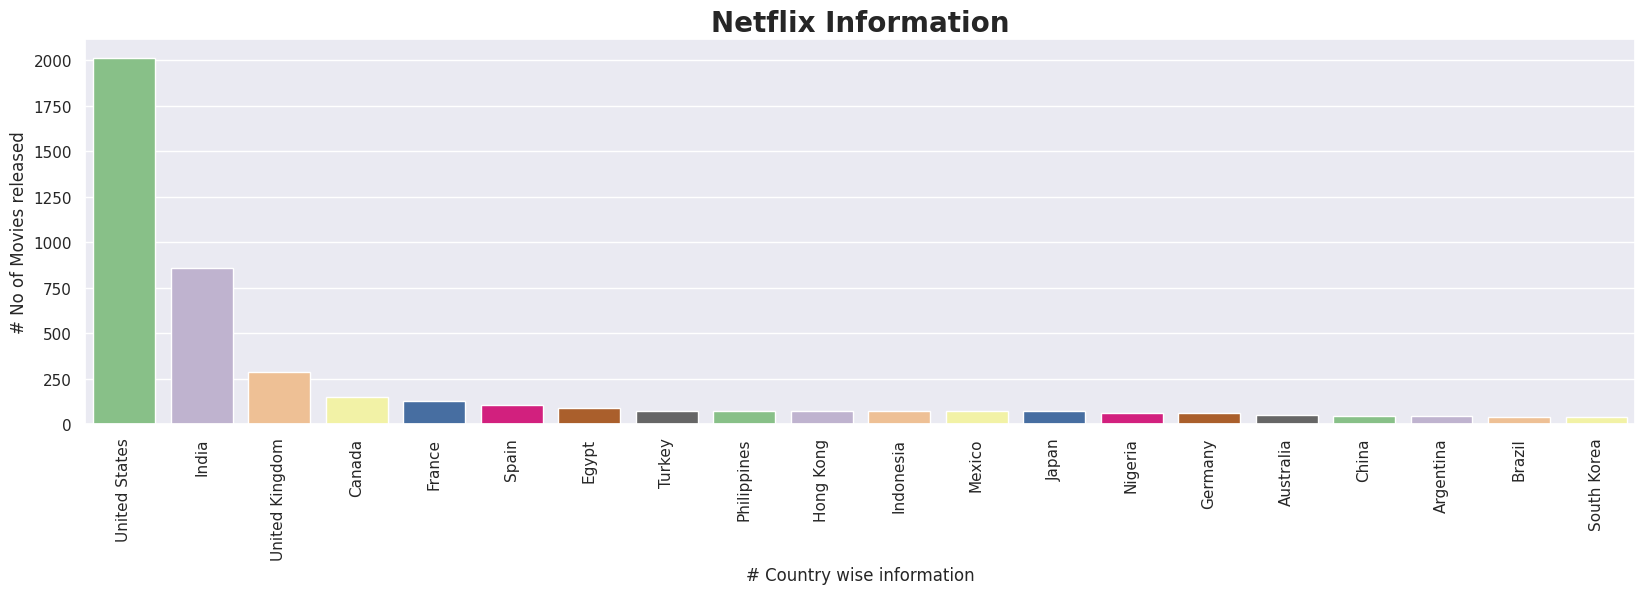

In [36]:
#Countrywise movie contribution
df_country_main= movie_df[["country_main","show_id"]].groupby("country_main").count().reset_index().sort_values(by="show_id",ascending=False).head(20)
fig=plt.figure(figsize=(20,5))
sns.barplot(data=df_country_main,x=df_country_main["country_main"],y=df_country_main["show_id"],palette="Accent")
plt.xticks(rotation=90)
plt.xlabel("# Country wise information")
plt.ylabel("# No of Movies released")
plt.title("Netflix Information",fontweight="bold",fontsize=20)
plt.show()

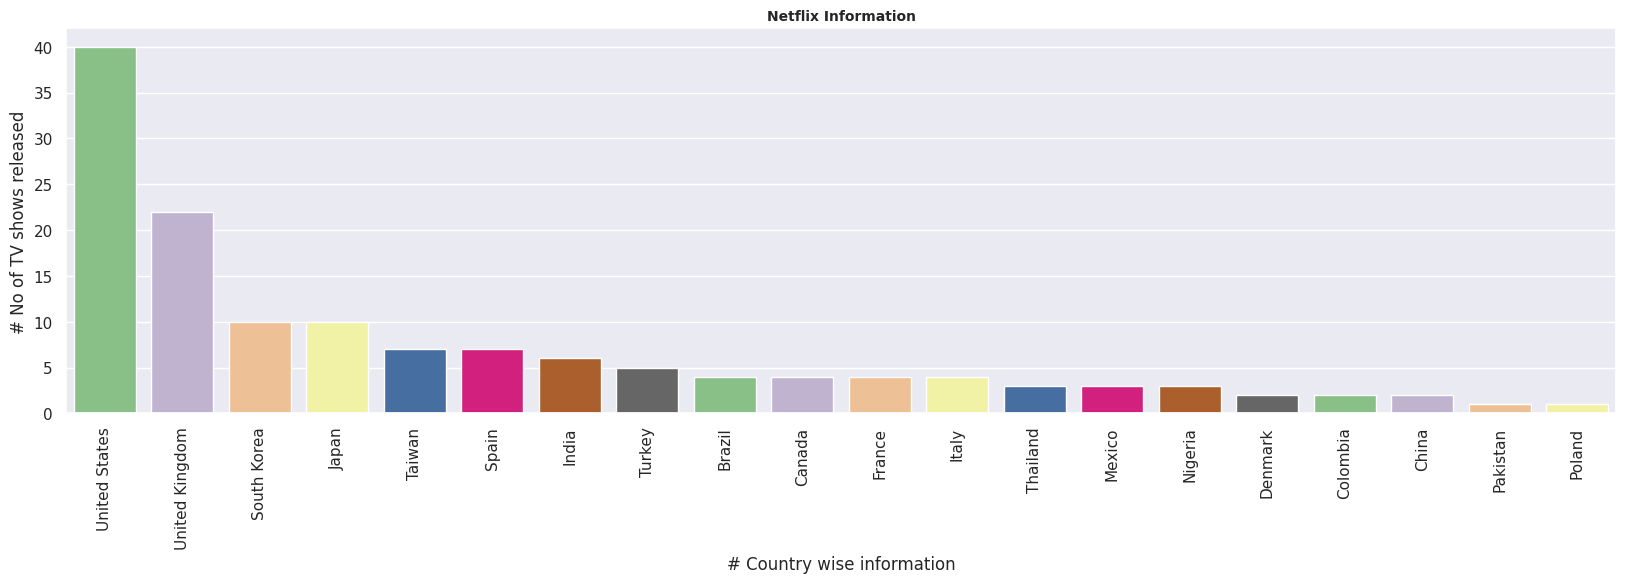

In [37]:
#Countrywise movie contribution
df_country_main= tv_df[["country_main","show_id"]].groupby("country_main").count().reset_index().sort_values(by="show_id",ascending=False).head(20)
fig=plt.figure(figsize=(20,5))
sns.barplot(data=df_country_main,x=df_country_main["country_main"],y=df_country_main["show_id"],palette="Accent")
plt.xticks(rotation=90)
plt.xlabel("# Country wise information")
plt.ylabel("# No of TV shows released")
plt.title("Netflix Information",fontweight="bold",fontsize=10)
plt.show()

!pip install squarify

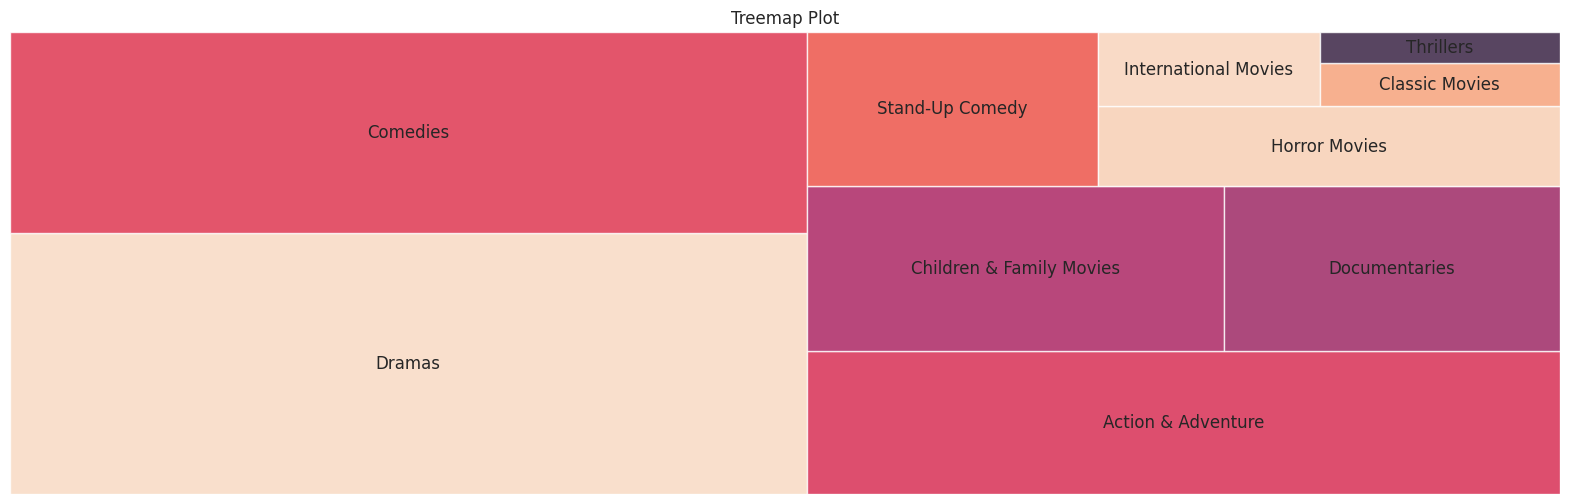

In [38]:
!pip install squarify
import squarify
df_genre=movie_df[["Genre","show_id"]].groupby("Genre").count().reset_index().sort_values(by="show_id",ascending=False).head(10)
df_genre
# Create a treemap plot
plt.figure(figsize=(20, 6))
squarify.plot(sizes=df_genre["show_id"], label=df_genre["Genre"], alpha=0.8)
plt.title('Treemap Plot')
plt.axis('off')  # Turn off axis
plt.show()

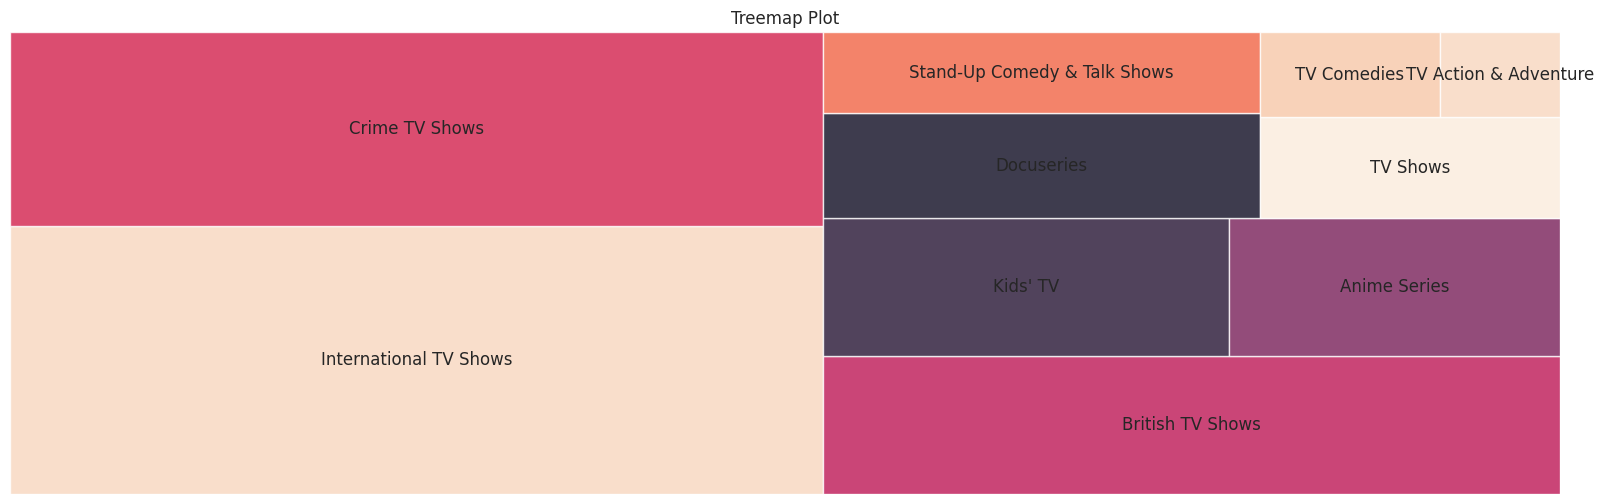

In [39]:
import squarify
df_genre=tv_df[["Genre","show_id"]].groupby("Genre").count().reset_index().sort_values(by="show_id",ascending=False).head(10)
df_genre
# Create a treemap plot
plt.figure(figsize=(20, 6))
squarify.plot(sizes=df_genre["show_id"], label=df_genre["Genre"], alpha=0.8)
plt.title('Treemap Plot')
plt.axis('off')  # Turn off axis
plt.show()


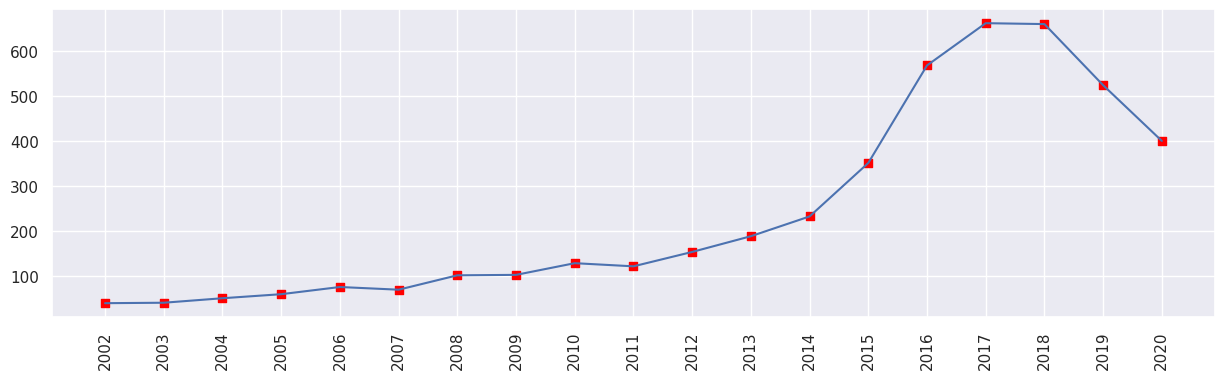

In [40]:
#Year wise movie released
plt.figure(figsize=(15,4))
release = df['release_year'].value_counts().sort_index(ascending=True)
plt.plot(release[-20:-1])
plt.scatter(x=release[-20:-1].index,y=release[-20:-1].values,c="Red",marker="s")
plt.xticks(rotation = 90)
plt.xticks(release[-20:-1].index)
plt.show()

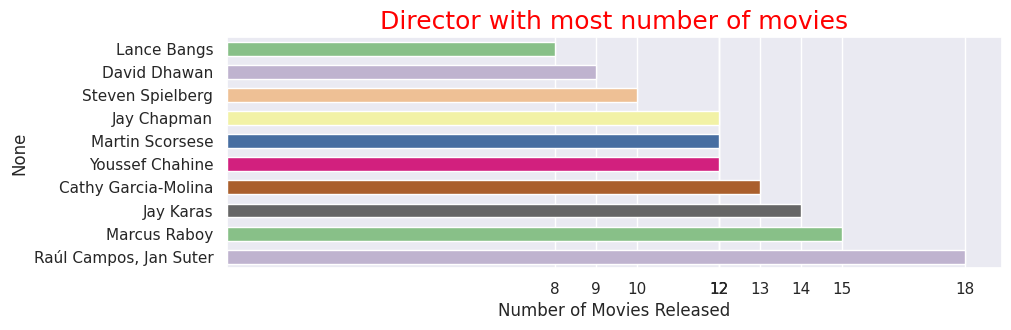

In [41]:
plt.figure(figsize=(10,3))
sns.barplot(y= movie_df.director.value_counts()[:10].sort_values().index,
            x=movie_df.director.value_counts()[:10].sort_values().values,palette="Accent",width=0.6);
plt.title('Director with most number of movies', color='red', fontsize=18)
plt.xticks(movie_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Movies Released');


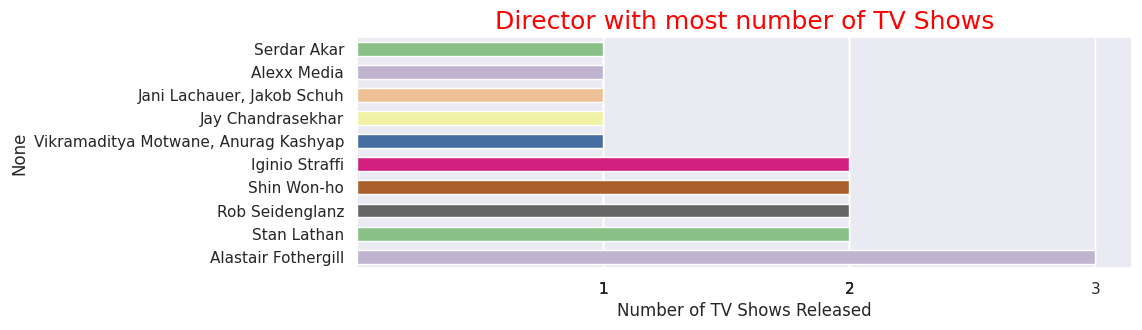

In [42]:
plt.figure(figsize=(10,3))
sns.barplot(y= tv_df.director.value_counts()[:10].sort_values().index,
            x=tv_df.director.value_counts()[:10].sort_values().values,palette="Accent",width=0.6);
plt.title('Director with most number of TV Shows', color='red', fontsize=18)
plt.xticks(tv_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of TV Shows Released');

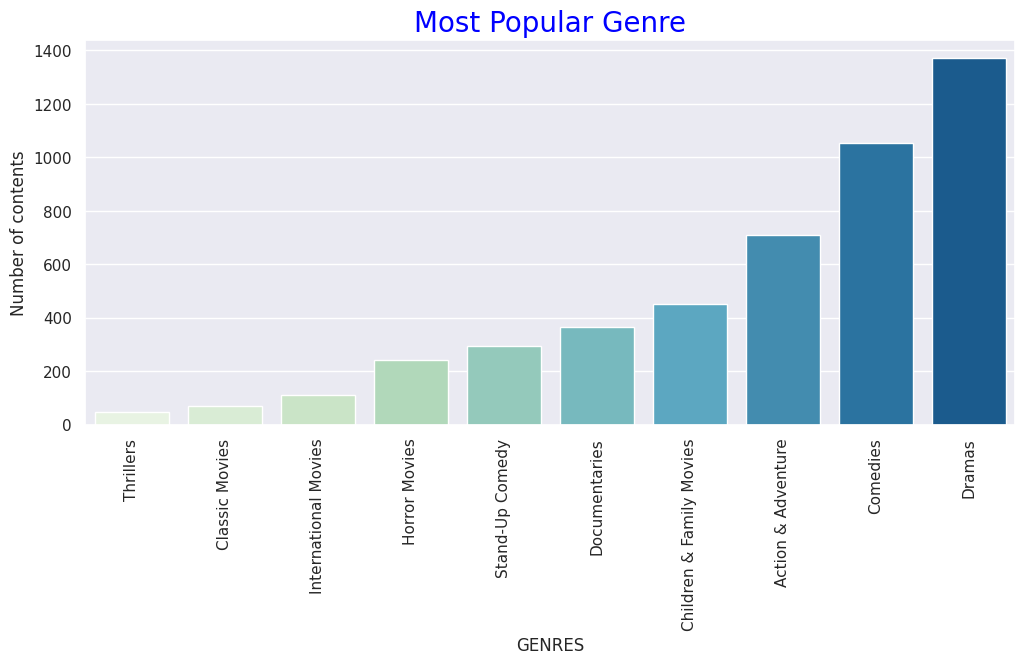

In [43]:
#Most Popular Genre on Netflix
plt.figure(figsize=(12,5))
sns.barplot(x= df.Genre.value_counts()[:10].sort_values().index,
            y=df.Genre.value_counts()[:10].sort_values().values,palette='GnBu');
plt.title('Most Popular Genre', color='Blue', fontsize=20)
#plt.yticks(df.Genre.value_counts()[:10].sort_values().values);
plt.xticks(rotation =90)
plt.xlabel('GENRES');
plt.ylabel('Number of contents');

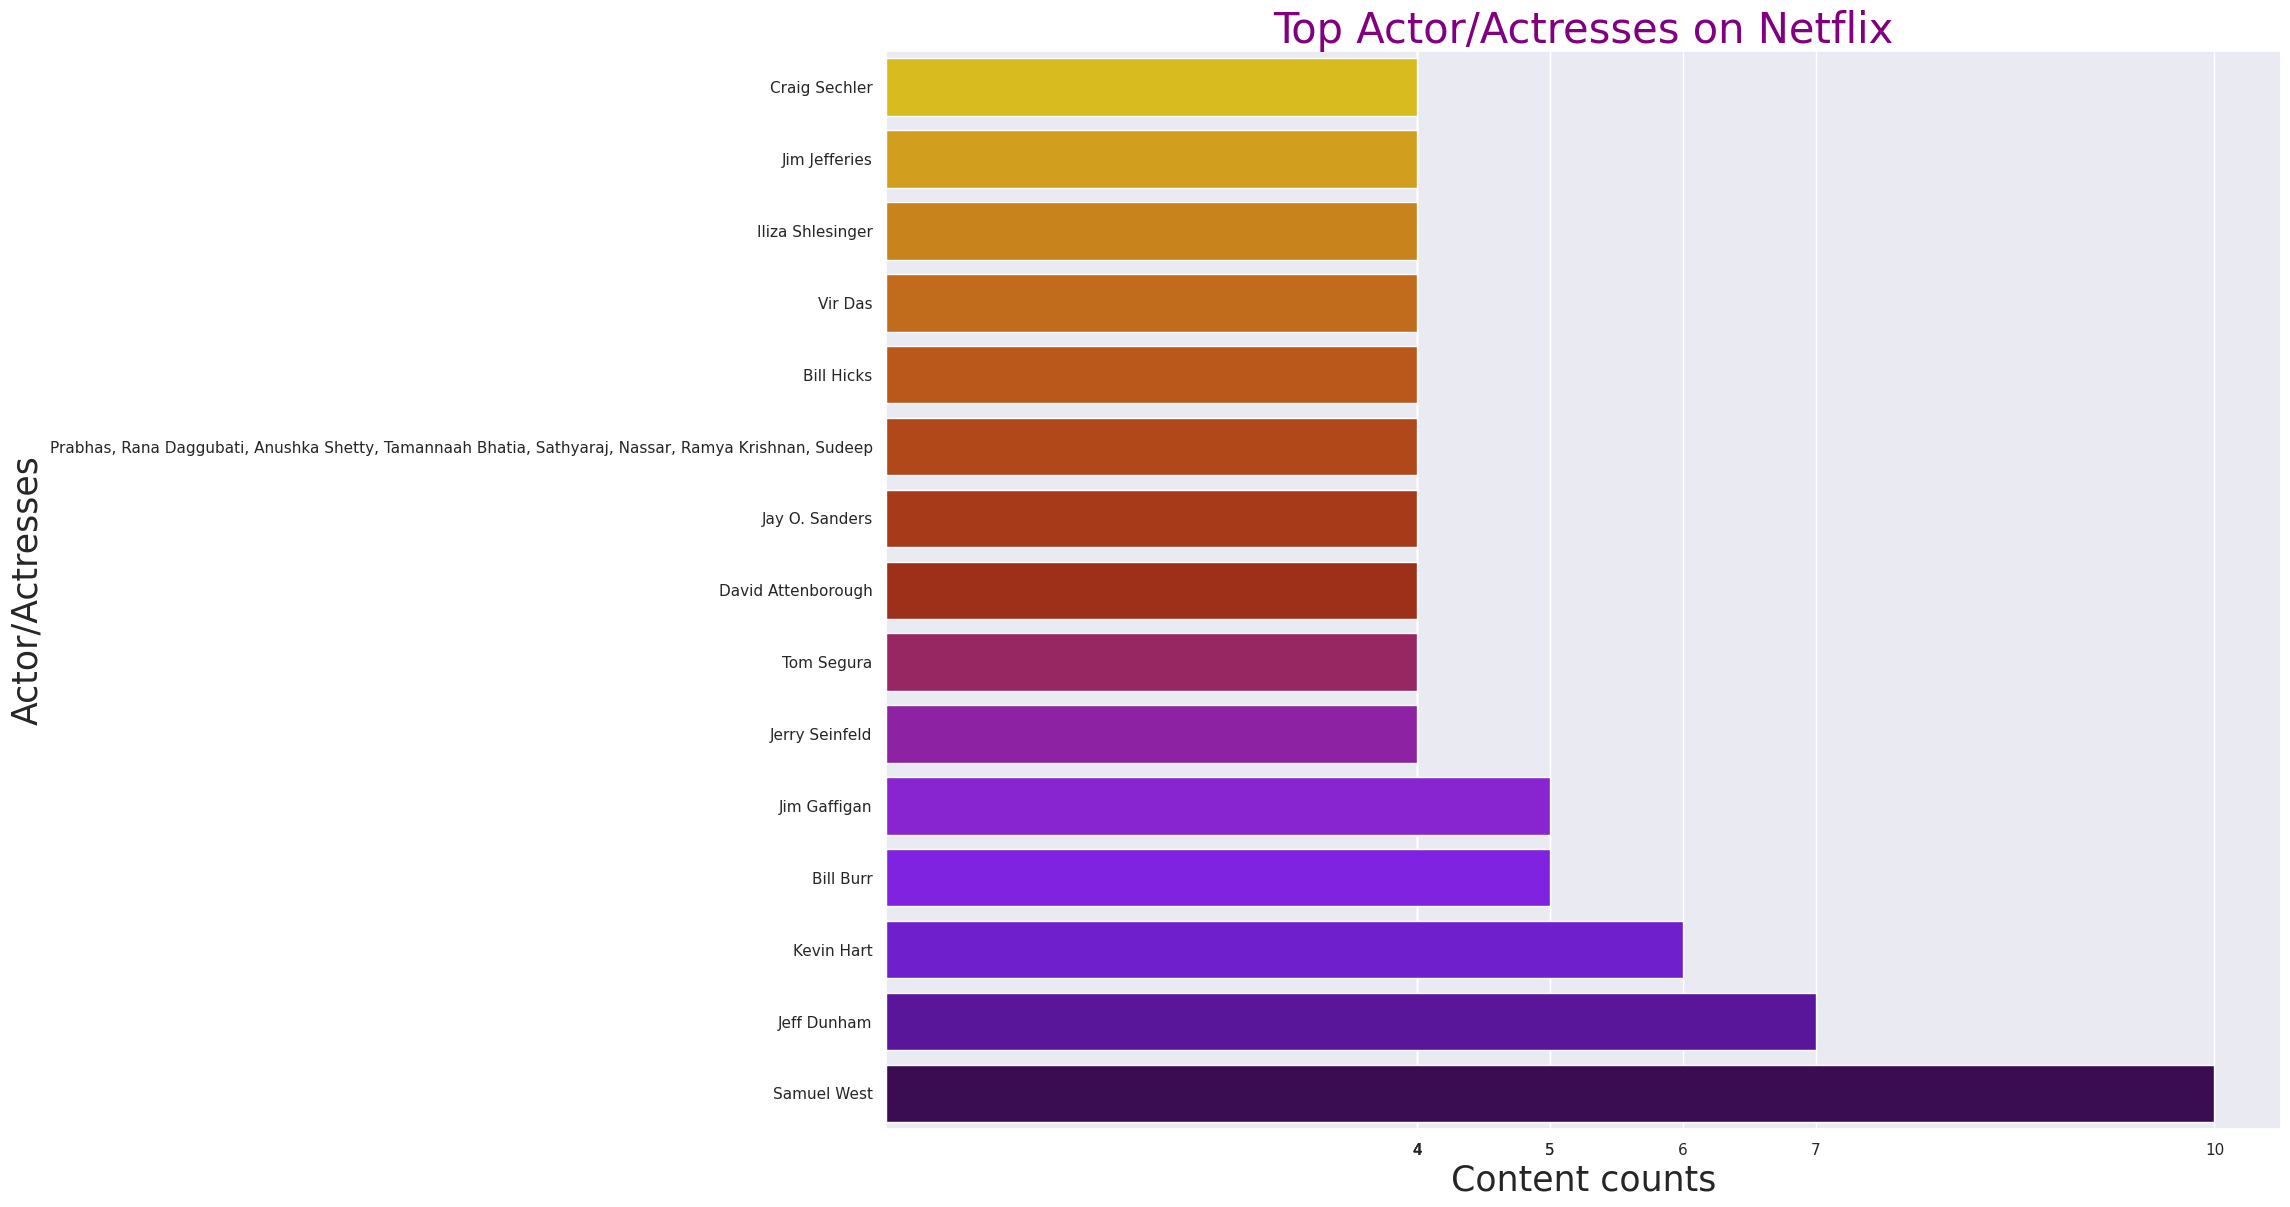

In [44]:
 #Top Actor/Actresses on Netflix
plt.figure(figsize=(18,14))
sns.barplot(y= df.cast.value_counts()[:15].sort_values().index,
            x=df.cast.value_counts()[:15].sort_values().values,
            palette='gnuplot_r');
plt.title('Top Actor/Actresses on Netflix', color='purple', fontsize=30)
plt.xticks(df.cast.value_counts()[:10].sort_values().values);
plt.ylabel('Actor/Actresses', fontsize=25);
plt.xlabel('Content counts', fontsize=25);

## **Netflix Recommendation System**

**Content Based Filtering**

For this recommender system the content of the movie (cast, description, director,genre etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.




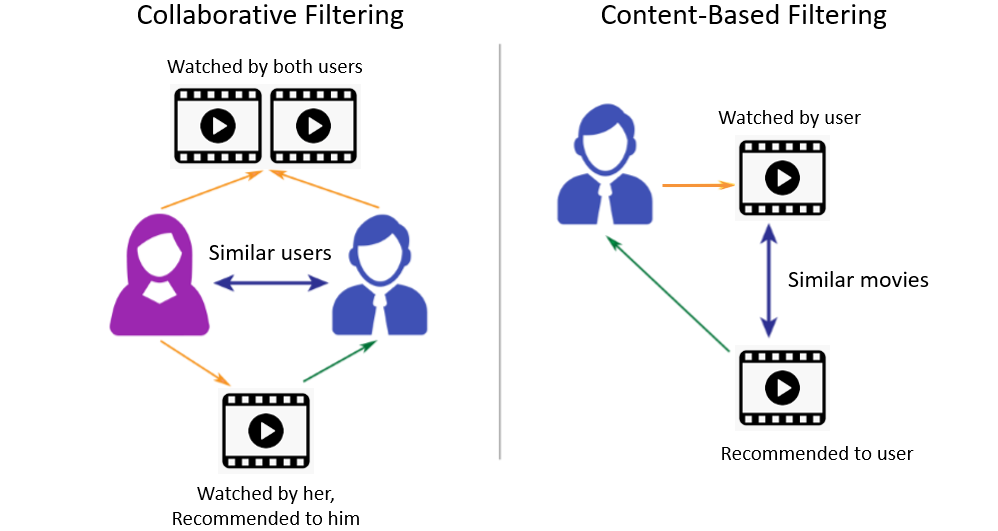



**TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used in information retrieval and natural language processing to evaluate the importance of a term within a collection of documents. It combines two components:**

**Term Frequency (TF):** This measures how frequently a term appears in a document. It is calculated as the ratio of the number of occurrences of a term
t to the total number of terms in the document. The idea behind TF is that terms that appear more frequently in a document are more important.

***TF(t,d)= Number of occurrences of term t in document d/Total number of terms in document d***

**Inverse Document Frequency (IDF):** This measures how important a term is across a collection of documents. It is calculated as the logarithm of the ratio of the total number of documents N to the number of documents containing the term t.

The idea behind IDF is to give less importance to terms that appear frequently across many documents and more importance to terms that are rare and appear in only a few documents.

***IDF(t) = log(N/(df(t))***


Where:

**N **is the total number of documents in the corpus.


**df(t) **is the number of documents containing term t.
TF-IDF is then calculated as the product of TF and IDF:



**TF-IDF(t,d)=TF(t,d)×IDF(t)**

The TF-IDF score represents the importance of a term t in a document d relative to a collection of documents.

**A = “The car is driven on the road”; **

**B = “The truck is driven on the highway”**

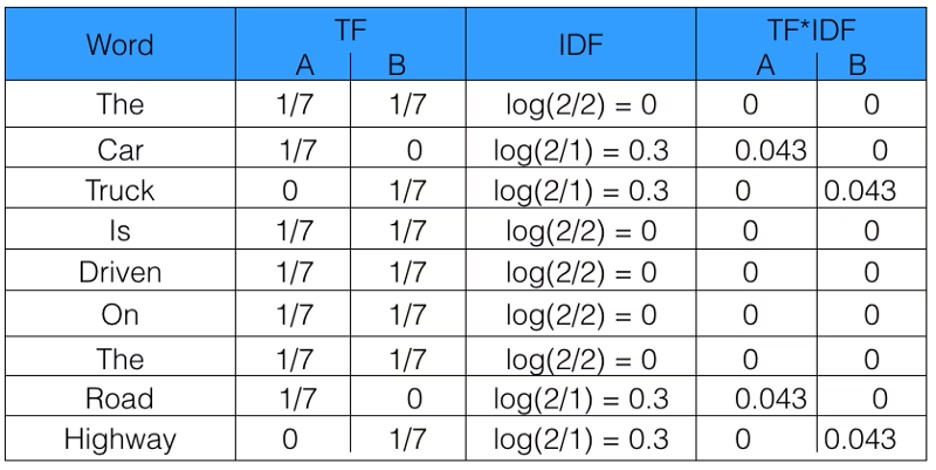

In [45]:
df['description'].head()

1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
5    A genetics professor experiments with a treatm...
Name: description, dtype: object

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'

In [47]:
#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

In [48]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape
#This will print something like Shape of TF-IDF matrix: (1000, 5000),
# indicating that you have 1000 documents and 5000 unique terms
#in your TF-IDF matrix. Adjust the numbers according to your specific data.

(4979, 13910)

In [49]:
print("Vocabulary (unique terms):", tfidf.get_feature_names_out())

Vocabulary (unique terms): ['000' '007' '10' ... 'über' 'ōarai' 'şeref']


In [50]:
print("TF-IDF matrix (sparse representation):\n", tfidf_matrix[0])

TF-IDF matrix (sparse representation):
   (0, 517)	0.2672956852353291
  (0, 11805)	0.25342662784218334
  (0, 3397)	0.27328972732336515
  (0, 12837)	0.217027287926941
  (0, 10268)	0.3271948204197523
  (0, 13407)	0.3073317209385705
  (0, 7181)	0.12993130609076056
  (0, 13421)	0.2890559563529998
  (0, 12132)	0.27328972732336515
  (0, 12730)	0.24633718077517164
  (0, 2313)	0.1827951506309157
  (0, 7838)	0.2497205577177726
  (0, 5830)	0.23638538933298947
  (0, 3919)	0.2890559563529998
  (0, 3434)	0.26461294536074226


In [51]:
df['description']

1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
5       A genetics professor experiments with a treatm...
                              ...                        
7778    Looking to survive in a world taken over by zo...
7780    A drug dealer starts having doubts about his t...
7781    Dragged from civilian life, a former superhero...
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 4979, dtype: object

from sklearn.feature_extraction.text

 import TfidfVectorizer
# assign documents
d0 = 'first document'

d1 = 'second'

d2 = 'third'


# merge documents into a single corpus
string = [d0, d1, d2]
# create object
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(string)
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)

# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())

In [54]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [55]:
indices

title
7:19             1
23:59            2
9                3
21               4
46               5
              ... 
Zombieland    7778
Zoo           7780
Zoom          7781
Zozo          7782
Zubaan        7783
Length: 4979, dtype: int64

In [53]:
#Let's define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies.

cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.01621439, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.07682624],
       ...,
       [0.01621439, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.02239521],
       [0.        , 0.        , 0.07682624, ..., 0.        , 0.02239521,
        1.        ]])

In [64]:
idx = indices["Darna Mana Hai"]
sim_scores = list(enumerate(cosine_sim[idx]))
# Sort the movies based on the similarity scores
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
# Get the scores of the 10 most similar movies
sim_scores = sim_scores[1:11]
# Get the movie indices
movie_indices = [i[0] for i in sim_scores]
# Return the top 10 most similar movies
df['title'].iloc[movie_indices]

2338                               Galih dan Ratna
1969                          El-Khawaga's Dilemma
5616                                      Sin City
3752           Love Dot Com: The Social Experiment
5302                                 Runaway Bride
133                                         7 años
3785                              Love, Guaranteed
6313                                   The Dreamer
3939    Maria Bamford: The Special Special Special
2470                               Golmaal Returns
Name: title, dtype: object

**sorted():** This function sorts the elements of a sequence (such as a list or tuple) in ascending order by default. It returns a new sorted list.

**sim_scores:** This is the list of similarity scores, typically obtained from some similarity computation method.

**key=lambda x: x[1]: ** : **bold text**This specifies a custom sorting key. It tells the sorted() function to sort the elements based on the value of the second element (x[1]) of each tuple in the list.

**reverse=True:** This parameter reverses the sorting order, so the list is sorted in descending order (from highest to lowest).

***In summary, the code sorts the list sim_scores based on the second element of each tuple (assumed to be similarity scores) in descending order, resulting in a sorted list of similarity scores from highest to lowest. This can be useful, for example, when you want to retrieve the most similar items or documents based on their similarity scores.***